In [1]:
# distance between a and b
def d(a, b):
    # TODO: what kind of measure should we select L1, L2?
    return 0


# how far did we go?
def g(lab, dist, position, destination):
    # TODO: distance already covered
    return 0


# lower-bound estimation for remaining path
def h(lab, dist, position, destination):
    # TODO: what is the best possible remainder?
    return 0


def A_star(lab, dist, position, destination):
    neighbours = [
                    (1, 0), (0, 1), (-1, 0), (0, -1),
                    (1, 1), (-1, 1), (1, -1), (-1, -1),
                 ]   # 9-neghbourhood
    candidates = []  # where go next?
    
    for neighbour in neighbours:
        candidate = (position[0] + neighbour[0], position[1] + neighbour[1]) 
        # it is inside labyrinth
        if 0 <= candidate[0] < len(lab) and 0 <= candidate[1] < len(lab[0]):
            # it is accessible
            if lab[candidate[0]][candidate[1]] == 0:
                candidates.append(candidate)

    # best choise
    result, estimation = position, 10000000
    for candidate in candidates:
        new_dist = dist + d(position, candidate)
        A = g(lab, new_dist, candidate, destination) + \
            h(lab, new_dist, candidate, destination)
        # print(A, candidate)
        if A < estimation:
            result, estimation = candidate, A
    lab[result[0]][result[1]] = 2   # visited
    return result, d(result, position)

In [2]:
import matplotlib.pyplot as plt

def show(matr):
    plt.imshow(matr)
    plt.show()

Go to (19, 19)


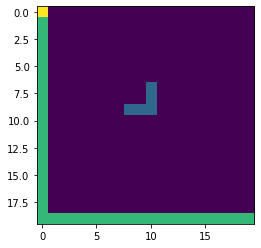

In [6]:
import time
from IPython.display import clear_output

size = 20
line = list([0] * size)
lab = [list(line) for i in range(size)]

lab[0][0] = 3
lab[7][10] = 1
lab[8][10] = 1
lab[9][10] = 1
lab[9][9] = 1
lab[9][8] = 1

start = (0, 0)
finish = (size-1, size-1)
passed = 0
while start != finish:
    clear_output()
    start, delta = A_star(lab, passed, start, finish)
    print("Go to", start)
    show(lab)
    time.sleep(0.3)
    passed += delta